In [33]:
import ScraperFC as sfc
import traceback
from data_viz_helpers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mplsoccer import VerticalPitch, Pitch
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr

In [2]:
scraper = sfc.WhoScored()
try:
    match_data = scraper.scrape_match(
        'https://www.whoscored.com/Matches/1549753/Live/England-Premier-League-2021-2022-Manchester-City-Chelsea'
    )
except:
    traceback.print_exc()
scraper.close()

In [3]:
match_data['matchCentreData']['playerIdNameDictionary']

{'73084': 'Kevin De Bruyne',
 '19119': 'Fernandinho',
 '121774': 'Ederson',
 '279379': 'Gabriel Jesus',
 '77464': 'Ilkay Gündogan',
 '128967': 'João Cancelo',
 '136741': 'Bernardo Silva',
 '313171': 'Rúben Dias',
 '303139': 'Rodri',
 '122117': 'Aymeric Laporte',
 '145473': 'Zack Steffen',
 '331254': 'Phil Foden',
 '69778': 'Kyle Walker',
 '97692': 'Raheem Sterling',
 '101374': 'John Stones',
 '113069': 'Jack Grealish',
 '425406': 'Joshua Wilson-Esbrand',
 '425576': 'James McAtee',
 '408822': 'Luke Mbete',
 '425319': 'Romeo Lavia',
 '78498': 'Romelu Lukaku',
 '28550': 'Thiago Silva',
 '93894': 'Mateo Kovacic',
 '114075': "N'Golo Kanté",
 '322747': 'Malang Sarr',
 '326413': 'Kai Havertz',
 '104010': 'Antonio Rüdiger',
 '130903': 'Timo Werner',
 '106968': 'Jorginho',
 '115868': 'Hakim Ziyech',
 '84008': 'Marcos Alonso',
 '112161': 'Saúl Ñíguez',
 '113880': 'Kepa Arrizabalaga',
 '25931': 'César Azpilicueta',
 '302692': 'Christian Pulisic',
 '135768': 'Marcus Bettinelli',
 '255777': 'Ruben 

In [49]:
player_id = 73084
event_locations = list()

for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] == player_id:
        event_locations.append([event['x'], event['y']])

event_locations = np.array(event_locations)
event_locations.shape

(73, 2)

In [50]:
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)

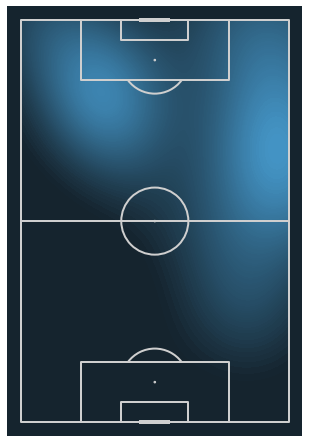

In [51]:
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#15242e')
fig, ax = pitch.draw(figsize=(4.4, 6.4))

# Scale the Opta data to the range [0,130] and [0,90]
# for x and y respectively
x = event_locations[:,0] / 100 * 130
y = event_locations[:,1] / 100 * 90

kdeplot = pitch.kdeplot(x, y, ax=ax, cmap=pearl_earring_cmap_100, shade=True, levels=100)

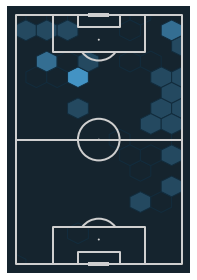

In [52]:
fig, ax = pitch.draw()
hexmap = pitch.hexbin(x, y, ax=ax, edgecolors='#122c3d', gridsize=(8, 8),
                      cmap=pearl_earring_cmap)

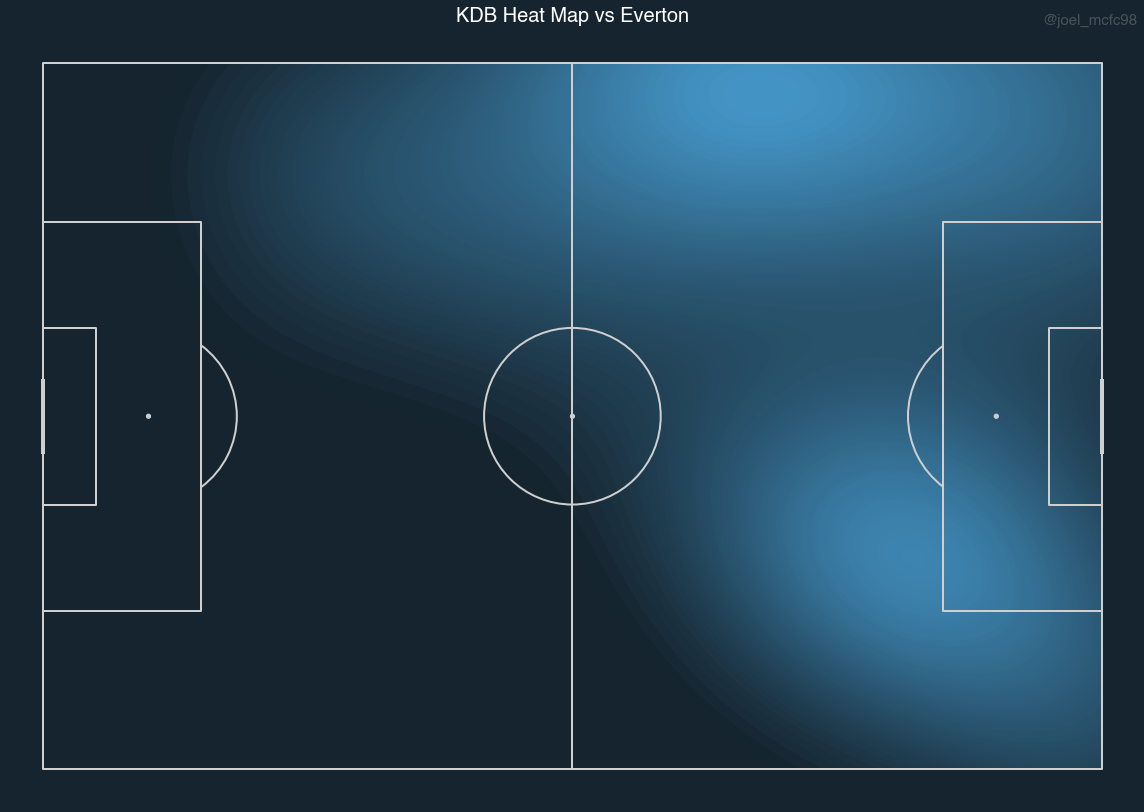

In [53]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#15242e', line_zorder=2, line_color='#cfcfcf')
fig, ax = pitch.draw(figsize=(16, 12))
plt.rcParams['font.family'] = 'Helvetica' ##set global font
fig.set_facecolor('#15242e')
ax.patch.set_facecolor('#15242e')

dict = {'fontsize': plt.rcParams['axes.titlesize'],
     'fontweight' : plt.rcParams['axes.titleweight']}

plt.gca().invert_yaxis()



kdeplot = pitch.kdeplot(x, y, ax=ax, cmap=pearl_earring_cmap_100, shade=True, levels=100)

ax.text(1, 1, '@joel_mcfc98', transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='right', va='bottom')

# plt.legend(['Succesful Pass', 'Unsuccessful Pass'], loc='upper left')
plt.title('KDB Heat Map vs Everton',fontdict=dict,color='white',size=20, pad =plt.rcParams['axes.titlepad'])  
fig.savefig("Cancelo", dpi=180) ##save image